<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/_L230831.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 그룹 연산
    - groupby, apply

2. 시계열 데이터 분석
    - timestamp

    - resample

    - rolling, query

    - 주식, 기온 자료, 식품 영양정보 처리

3. 교재 : chapter 2 ~ 6

4. 파이썬 생활프로그래밍 Chap. 5

5. DB : MySQL

6. Django : 블로그

7. 통계적 머신러닝

8. 딥러닝

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas_datareader.data as web
from datetime import datetime

# 주가 자료 불러오기
    - pandas_datareader 사용
    -  https://pydata.github.io/pandas-datareader/remote_data.html 에서 주어진 원격사용
    - 종목 코드 사용
    - naver 사용

In [ ]:
df = web.DataReader('005930', 'naver', start='2012-01-01', end='2023-08-29')

In [ ]:
df = df.astype({'Close':'int'})

<Axes: xlabel='Date'>

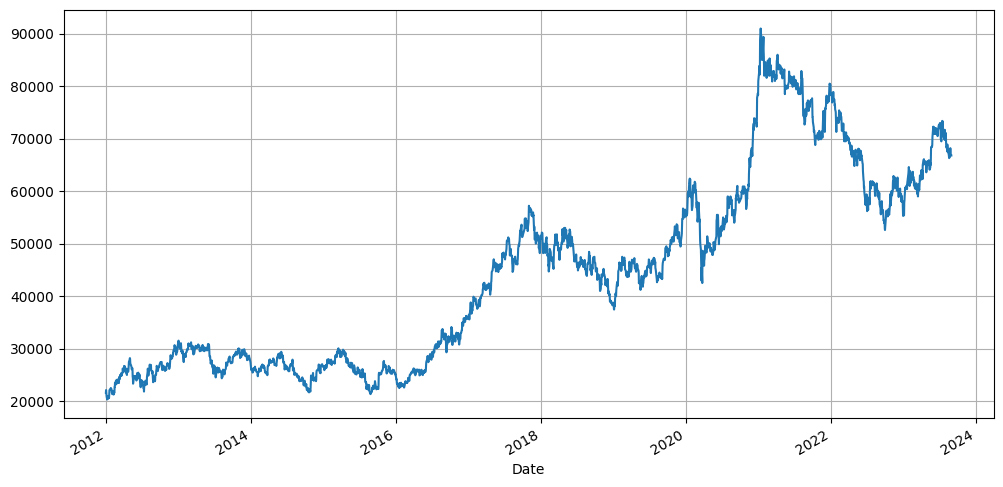

In [ ]:
df.Close.plot(figsize=(12, 6), grid=True)

# 수집된 주가 자료 처리

1. 과거자료 A, B 로 나눈다.

2. A를 이용해 회귀식을 구한다.

3. 구해진 회귀식으로 B 자료를 예측해 본다.

4. 구해진 회귀식이 B와 잘맞으면 그 회귀식을 실제 미래의 예측값 추정에 사용한다.

A 자료 = train 자료

B 자료 = test 자료

In [ ]:
df_train = df.iloc[:2800, :] # 훈련 자료 == A
df_test = df.iloc[2800:, :] # 테스트 자료 == B

In [ ]:
df_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-02,21400,21600,21300,21600,263300
2012-01-03,21860,22100,21840,22100,339046
2012-01-04,22100,22200,21500,21600,342389
2012-01-05,21460,21580,21100,21100,346691
2012-01-06,21120,21319,20600,20800,376753


In [ ]:
x = np.arange(len(df_train)).reshape(-1, 1)

In [ ]:
x

array([[   0],
       [   1],
       [   2],
       ...,
       [2797],
       [2798],
       [2799]])

In [ ]:
len(x)

2800

In [ ]:
y = df_train.Close.astype(float).to_numpy()

In [ ]:
y

array([21600., 22100., 21600., ..., 64200., 64100., 64500.])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

10차 방정식을 가정하여 회귀식을 구해보자

데이터 x : 0 ~ 2800 (1 씩 증가)

데이터 x의 10차 항으로 만들어 줌 : x의 2, 3, 4, 5, 6, 7, 8, 9, 10 => 선형 회귀에 적용 => 10 차 방정식의 회귀식

PolynomialFeatures : x 를 10차항 식으로 변환해주는 라이브러리

Pipeline : LinearRegression 과 PolynomialFeatures 를 연결해주는 라이브러리

In [ ]:
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

In [ ]:
linear_regression = LinearRegression()

In [ ]:
pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('linear_regression', linear_regression)])

In [ ]:
pipeline.fit(x, y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linear_regression', LinearRegression())])

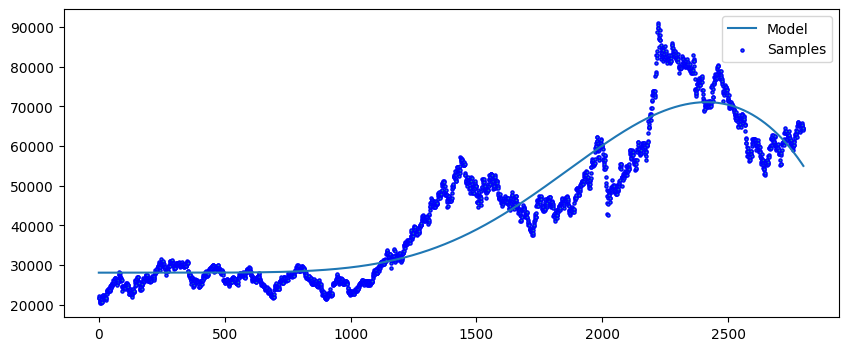

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(x, pipeline.predict(x), label='Model')
plt.scatter(x, y, edgecolor='b', s=5, label='Samples')
plt.legend(loc='best')
plt.show()

In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df_train.Close

In [ ]:
df_prophet

Date
2012-01-02    21600
2012-01-03    22100
2012-01-04    21600
2012-01-05    21100
2012-01-06    20800
              ...  
2023-05-09    65300
2023-05-10    64600
2023-05-11    64200
2023-05-12    64100
2023-05-15    64500
Name: Close, Length: 2800, dtype: int64

In [ ]:
df2 = df_prophet.reset_index()

In [ ]:
df2.head()

,Date,Close
0,2012-01-02,21600
1,2012-01-03,22100
2,2012-01-04,21600
3,2012-01-05,21100
4,2012-01-06,20800


In [ ]:
df2.columns=['ds', 'y']

In [ ]:
df2.head()

,ds,y
0,2012-01-02,21600
1,2012-01-03,22100
2,2012-01-04,21600
3,2012-01-05,21100
4,2012-01-06,20800


In [ ]:
df2.tail()

,ds,y
2795,2023-05-09,65300
2796,2023-05-10,64600
2797,2023-05-11,64200
2798,2023-05-12,64100
2799,2023-05-15,64500


In [ ]:
m = Prophet()

In [ ]:
m.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbufftz2/nijdrnpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbbufftz2/7k71zyam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94', 'data', 'file=/tmp/tmpbbufftz2/nijdrnpo.json', 'init=/tmp/tmpbbufftz2/7k71zyam.json', 'output', 'file=/tmp/tmpbbufftz2/prophet_modelu57spl7z/prophet_model-20230831012624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


m 을 사용하여 미래 값(=forecast) 산출 하기

1. m을 이용하여 미래 시간의 timestamp 만들기


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-23,66700,67100,66400,67100,9549352
2023-08-24,68300,68700,67900,68200,15044463
2023-08-25,67100,67400,66900,67100,7032462
2023-08-28,66800,67000,66500,66800,5824628
2023-08-29,66900,67200,66600,66800,9114352


In [ ]:
datetime(2023, 8, 29) - datetime(2023, 5, 15)

datetime.timedelta(days=106)

In [ ]:
future = m.make_future_dataframe(periods=107) # 6 ~ 10, 숫자 개수 5 = 10-6+1

2324232 - 1212 + 1

In [ ]:
future

,ds
0,2012-01-02
1,2012-01-03
2,2012-01-04
3,2012-01-05
4,2012-01-06
...,...
2902,2023-08-26
2903,2023-08-27
2904,2023-08-28
2905,2023-08-29


In [ ]:
forecast=m.predict(future)

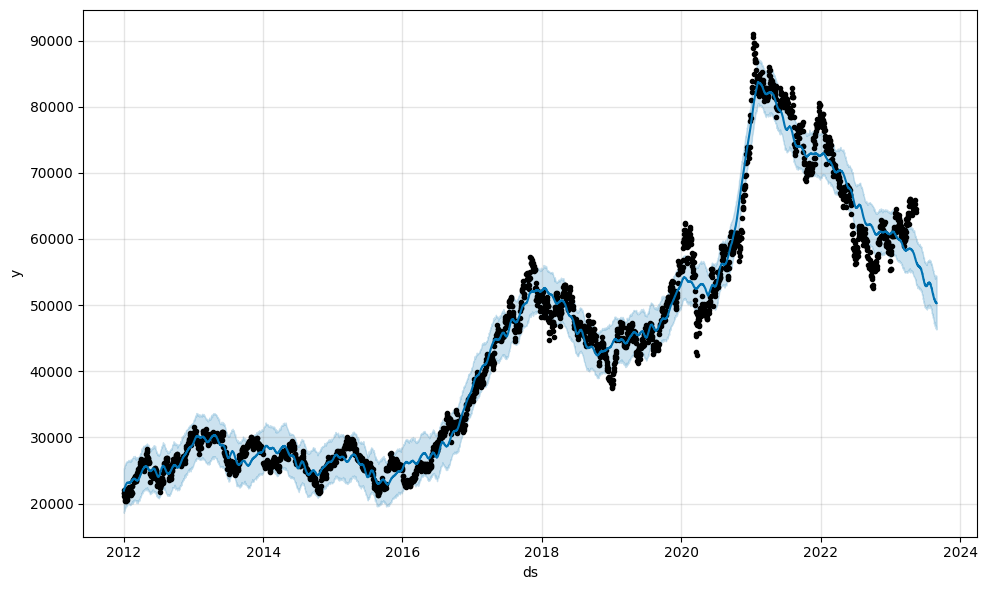

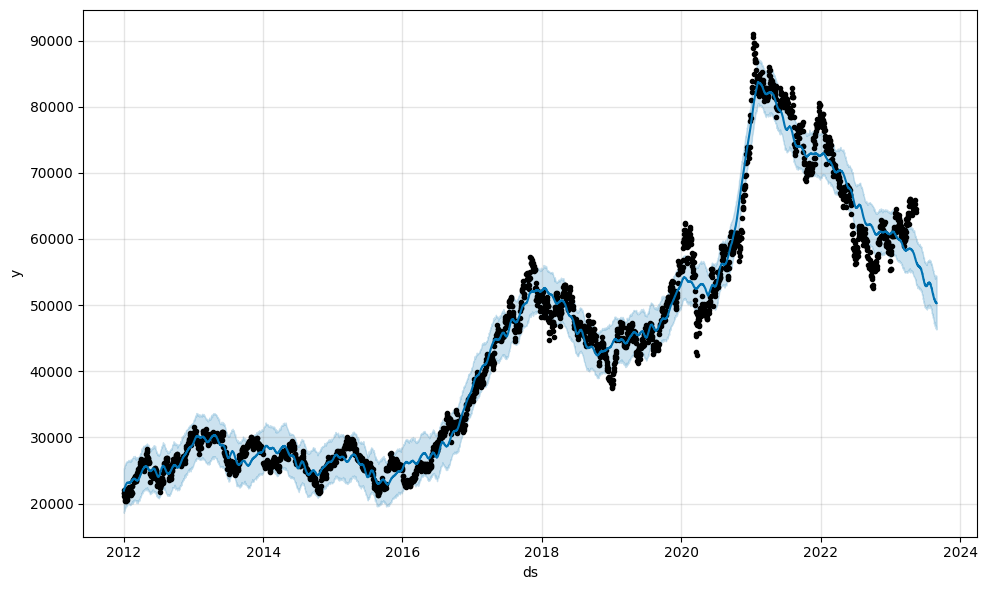

In [ ]:
m.plot(forecast)

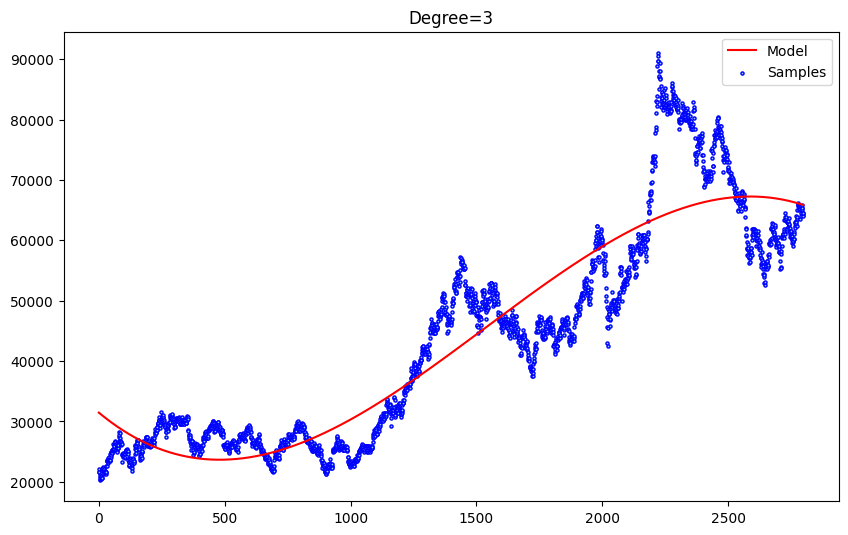

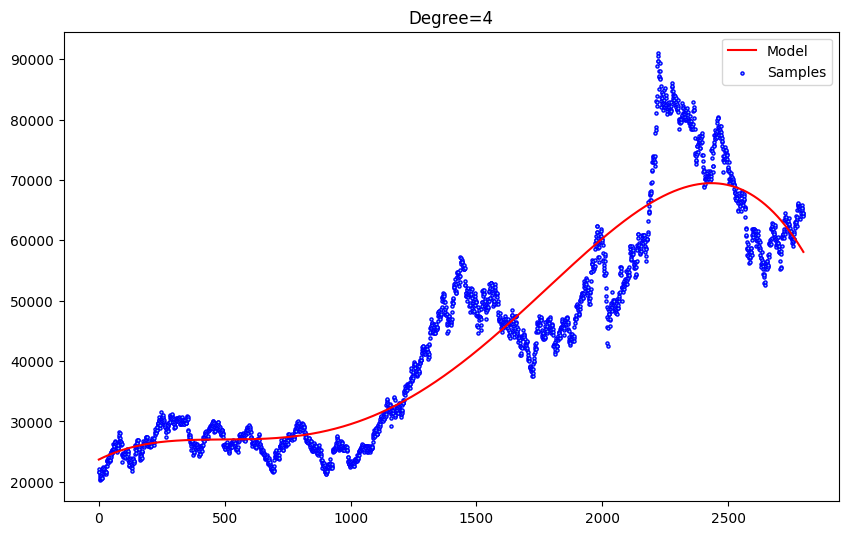

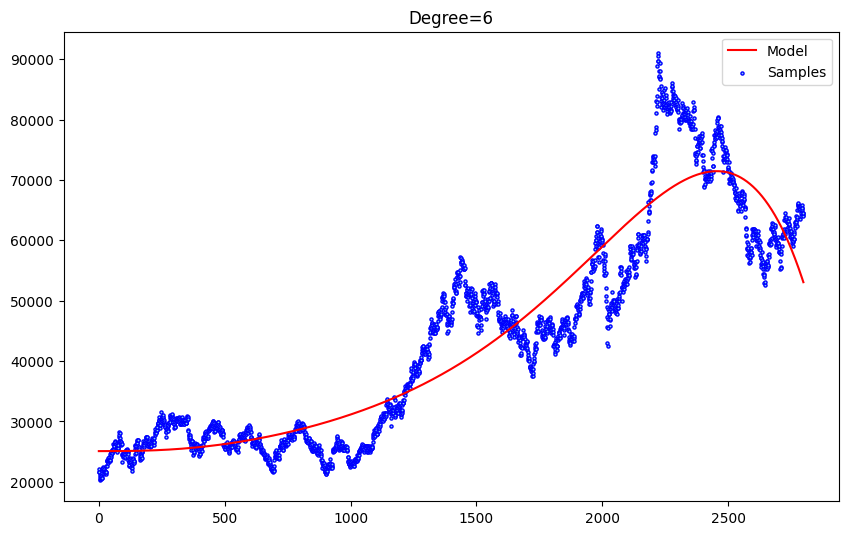

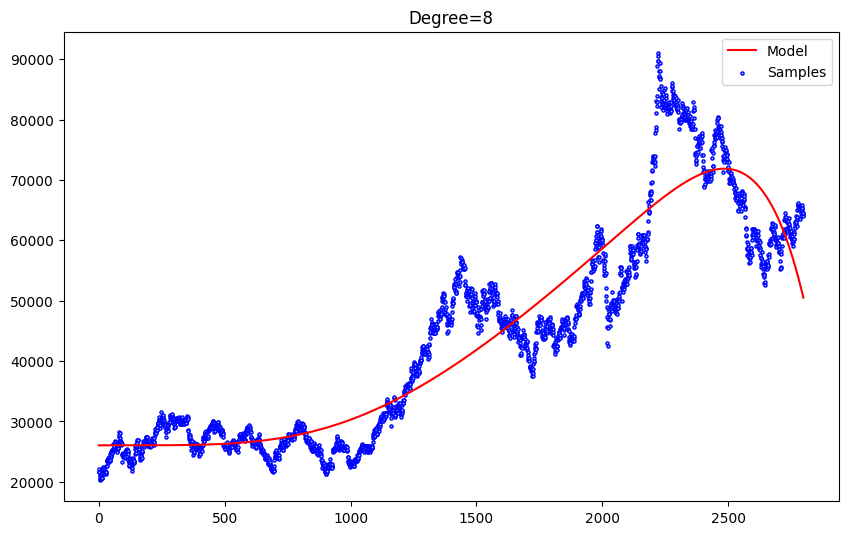

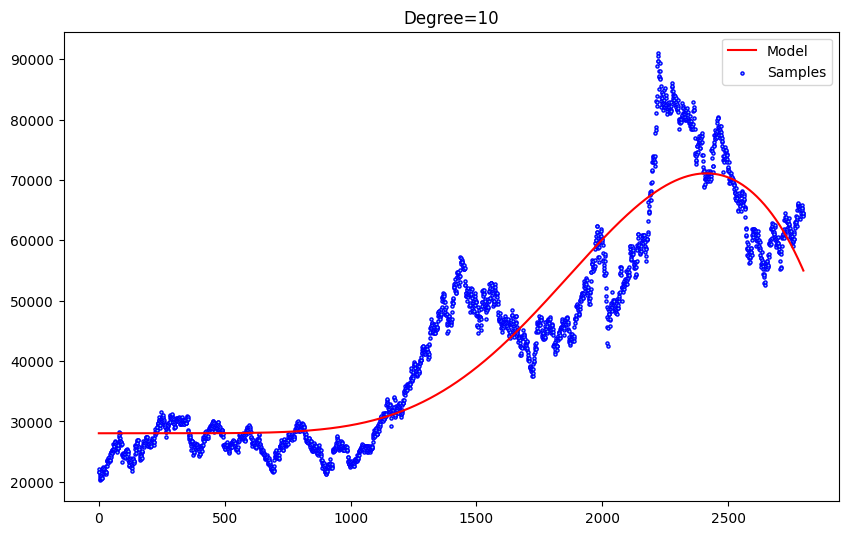

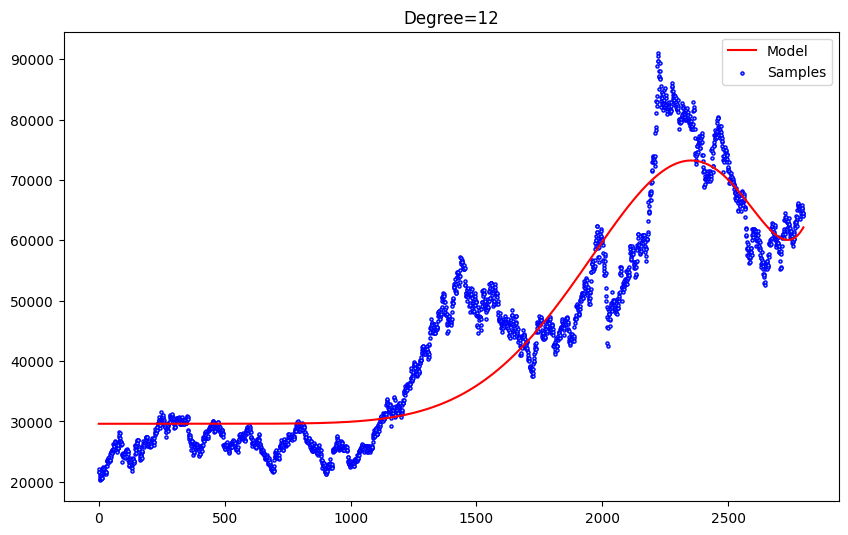

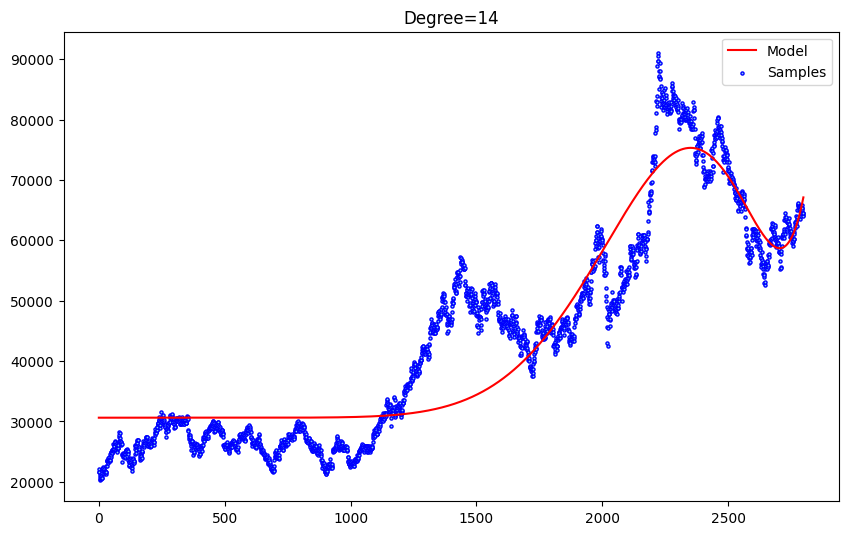

In [ ]:
degree = [3, 4, 6, 8, 10, 12, 14]
X=x
for i, j in enumerate(degree):
    polynomial_features = PolynomialFeatures(degree=j, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline( [ ('polynomial_features', polynomial_features), ('linear_regression', linear_regression) ] )
    pipeline.fit(X, y)

    plt.figure(figsize=(10, 50))
    plt.subplot(7, 1, i+1)
    plt.plot(X, pipeline.predict(X), label='Model', color='red')
    plt.scatter(X, y, edgecolors='b', s=5, label='Samples', color='skyblue')
    plt.title(f'Degree={j}')
    plt.legend(loc='best')
    plt.show()

기온 자료 분석

In [ ]:
ls

sample_data/  temperature_ts_data


In [ ]:
!head -40 ./temperature_ts_data

timestamp,temperature
2014-01-01 00:00:00,4.51929824561
2014-01-01 01:00:00,3.915
2014-01-01 02:00:00,3.62666666667
2014-01-01 03:00:00,3.44666666667
2014-01-01 04:00:00,3.19166666667
2014-01-01 05:00:00,3.26
2014-01-01 06:00:00,3.55166666667
2014-01-01 07:00:00,3.77833333333
2014-01-01 08:00:00,3.94833333333
2014-01-01 09:00:00,4.81333333333
2014-01-01 10:00:00,5.54333333333
2014-01-01 11:00:00,7.015
2014-01-01 12:00:00,7.385
2014-01-01 13:00:00,7.52166666667
2014-01-01 14:00:00,8.03833333333
2014-01-01 15:00:00,7.925
2014-01-01 16:00:00,7.43666666667
2014-01-01 17:00:00,6.865
2014-01-01 18:00:00,6.435
2014-01-01 19:00:00,
2014-01-01 20:00:00,6.48703703704
2014-01-01 21:00:00,6.00333333333
2014-01-01 22:00:00,5.29166666667
2014-01-01 23:00:00,4.62666666667
2014-01-02 00:00:00,3.76833333333
2014-01-02 01:00:00,3.145
2014-01-02 02:00:00,2.65666666667
2014-01-02 03:00:00,2.27333333333
2014-01-02 04:00:00,1.94333333333
2014-01-02 05:00:00,
2014-01-02 06:00:00,
2014-01-02 07:00:00,
2014-01

1. df 만들어 주세요.

2. 일 평균 값, 평균 구할때 사용되어진 데이터의 개수(size)

In [ ]:
data_file = './temperature_ts_data'

In [ ]:
data = pd.read_csv(data_file, parse_dates=[0], index_col=0)

In [ ]:
data.head()

,temperature
timestamp,
2014-01-01 00:00:00,4.519298
2014-01-01 01:00:00,3.915000
2014-01-01 02:00:00,3.626667
2014-01-01 03:00:00,3.446667
2014-01-01 04:00:00,3.191667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  8477 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [ ]:
diurnal_data = data.dropna().resample('D').agg(['mean', 'size'])

In [ ]:
diurnal_data

temperature     
                  mean size
timestamp                  
2014-01-01    5.418464   23
2014-01-02    2.757333    5
2014-01-03         NaN    0
2014-01-04    2.196111    9
2014-01-05    0.746597   24
...                ...  ...
2014-12-27   -1.083194   24
2014-12-28   -0.439861   24
2014-12-29    3.284931   24
2014-12-30    3.472292   24
2014-12-31   -0.550000   24

[365 rows x 2 columns]

하루에 매시간 자료가 19개 이하이면 일평균 값을 'NaN' 처리 한다.

In [ ]:
diurnal_data.loc[diurnal_data.temperature['size']<19,('temperature','mean')]=np.nan

In [ ]:
diurnal_data

temperature     
                  mean size
timestamp                  
2014-01-01    5.418464   23
2014-01-02         NaN    5
2014-01-03         NaN    0
2014-01-04         NaN    9
2014-01-05    0.746597   24
...                ...  ...
2014-12-27   -1.083194   24
2014-12-28   -0.439861   24
2014-12-29    3.284931   24
2014-12-30    3.472292   24
2014-12-31   -0.550000   24

[365 rows x 2 columns]

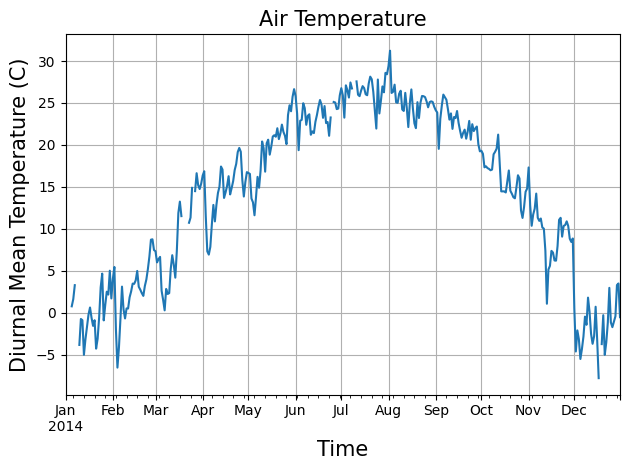

In [ ]:
fig = diurnal_data.loc[:, ('temperature', 'mean')].plot()
fig.set_title('Air Temperature', size=15)
fig.set_xlabel('Time', size=15)
fig.set_ylabel('Diurnal Mean Temperature (C)', size=15)
fig.grid()
fig.get_figure().tight_layout()
fig.get_figure().savefig('all_data_plot.png')

In [ ]:
df = diurnal_data.temperature['mean'].iloc[:120]

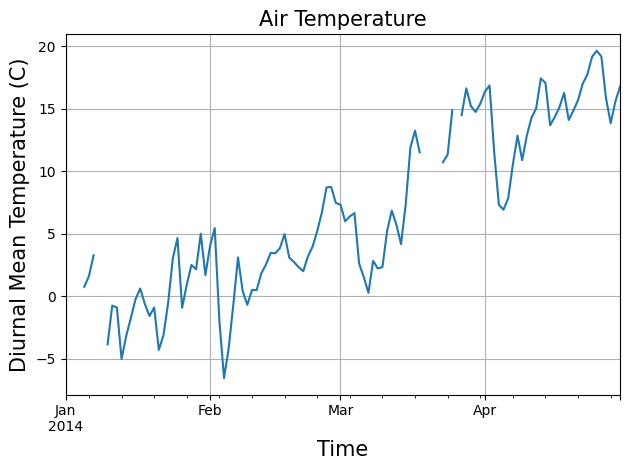

In [ ]:
fig=df.plot()
fig.set_title('Air Temperature', size=15)
fig.set_xlabel('Time', size=15)
fig.set_ylabel('Diurnal Mean Temperature (C)', size=15)
fig.grid()
fig.get_figure().tight_layout()
fig.get_figure().savefig('all_data_plot.png')

In [ ]:
methods = ['linear', 'quadratic', 'cubic']

In [ ]:
df_gapfilled = pd.DataFrame({m: df.interpolate(method=m) for m in methods})

In [ ]:
df.head()

timestamp
2014-01-01    5.418464
2014-01-02         NaN
2014-01-03         NaN
2014-01-04         NaN
2014-01-05    0.746597
Freq: D, Name: mean, dtype: float64

In [ ]:
df_gapfilled

,linear,quadratic,cubic
timestamp,,,
2014-01-01,5.418464,5.418464,5.418464
2014-01-02,4.250497,3.101056,4.529056
2014-01-03,3.082531,1.549943,2.956273
2014-01-04,1.914564,0.765123,1.446620
2014-01-05,0.746597,0.746597,0.746597
...,...,...,...
2014-04-26,19.178403,19.178403,19.178403
2014-04-27,15.826944,15.826944,15.826944
2014-04-28,13.839792,13.839792,13.839792


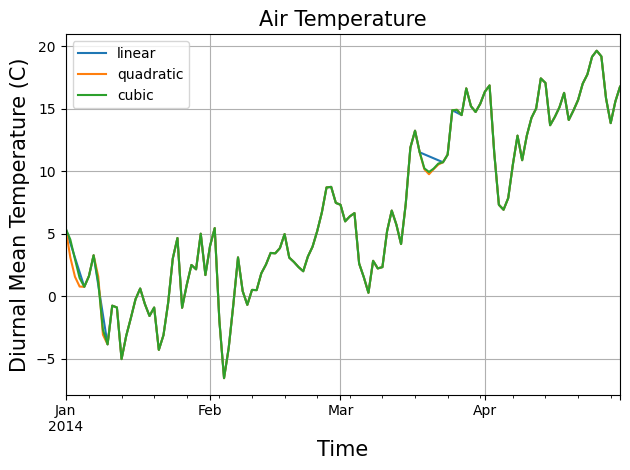

In [ ]:
fig=df_gapfilled.plot()
fig.set_title('Air Temperature', size=15)
fig.set_xlabel('Time', size=15)
fig.set_ylabel('Diurnal Mean Temperature (C)', size=15)
fig.grid()
fig.get_figure().tight_layout()
fig.get_figure().savefig('all_data_plot.png')

1. 수산물에 제일 많은 영양소 10개 선택

3. 영양소 10개 섭취하기 위해 수산물 대신에 먹을 수 있는 농축산물(3개씩) 찾기

글루탐산 - 달걀, 두부, 콩

글루탐산 제일 많은 농축산물이 차례로 달걀, 두부, 콩 순이다.